In [1]:
"""
This file will run the absolute minimum amount of work that actually produces
relevant output-- no aggregate shocks, perpetual youth, matching net worth.
Will run both beta-point and beta-dist versions.
"""


import code.calibration as parameters
from code.estimation import estimate, get_ky_ratio_difference, get_param_count
from code.options.all_options import all_options
import numpy as np
import matplotlib.pyplot as plt

basic_options = all_options["UseUniformBetaDist"].copy()
basic_options.update(all_options["DoStandardWork"])

# Options for life-cycle version of beta point model without estimation 
basic_options.update(all_options["SimpleSpecDist"])
basic_options["run_estimation"] = False
basic_options["do_lifecycle"] = True

# Verify that the options are correct
print(basic_options)



{'param_name': 'DiscFac', 'dist_type': 'uniform', 'run_estimation': False, 'run_sensitivity': [False, False, False, False, False, False, False, False], 'find_beta_vs_KY': False, 'do_tractable': False, 'do_param_dist': True, 'do_lifecycle': True, 'do_agg_shocks': False, 'do_liquid': False}


In [2]:
# Run the estimation 
param_count = get_param_count(basic_options)
EstimationEconomy = estimate(basic_options, parameters)

# Solve and simulate the model once, using "center" and "spread" from the paper
get_ky_ratio_difference(0.9814,
                    0.0182,
                    EstimationEconomy,
                    basic_options["param_name"],
                    param_count,
                    basic_options["dist_type"])

/Users/dc/Library/CloudStorage/OneDrive-JohnsHopkins/research/GitHub-forks/econ-ark/DistributionOfWealthMPC/code/estimation.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  x = v[:, idx].astype(float)


get_KY_ratio_difference tried center = 0.9814 and got -0.027371416353239475


-0.027371416353239475

In [5]:
# Extract data from the simulated agents

T_to_use = 200
N = len(EstimationEconomy.agents)
print(N)

C_data_big = np.concatenate([EstimationEconomy.agents[j].history["cNrm"][-T_to_use:,:] for j in range(N)], axis=1).flatten()
Y_data_big = np.concatenate([EstimationEconomy.agents[j].history["yNrm"][-T_to_use:,:] for j in range(N)], axis=1).flatten()
MPC_data_big = np.concatenate([EstimationEconomy.agents[j].history["MPC"][-T_to_use:,:] for j in range(N)], axis=1).flatten()
age_data_big = np.concatenate([EstimationEconomy.agents[j].history["t_age"][-T_to_use:,:] for j in range(N)], axis=1).flatten()
P_data_big = np.concatenate([EstimationEconomy.agents[j].history["pLvl"][-T_to_use:,:] for j in range(N)], axis=1).flatten()

# Generate average MPC and spending to income ratios by age

age_N = 270
MPC_mean_by_age = np.zeros(age_N)
BSMPC_mean_by_age = np.zeros(age_N)
for t in range(age_N):
    these = age_data_big == t
    MPC_mean_by_age[t] = np.mean(MPC_data_big[these])
    C_agg_this_age = np.sum(C_data_big[these] )
    Y_agg_this_age = np.sum(Y_data_big[these] )
    BSMPC_mean_by_age[t] = C_agg_this_age / Y_agg_this_age

21


/Users/dc/mambaforge/envs/cstwmpc/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/dc/mambaforge/envs/cstwmpc/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/var/folders/17/1rg0y2kj74l9p9g301vbhhkw0000gn/T/ipykernel_44884/257144759.py:23: RuntimeWarning: invalid value encountered in scalar divide
  BSMPC_mean_by_age[t] = C_agg_this_age / Y_agg_this_age


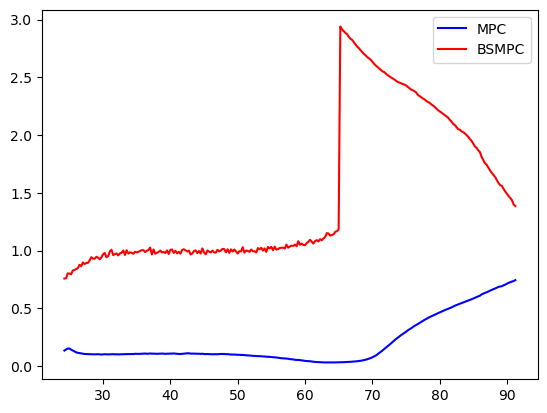

In [6]:
# Plot the results by age and/or write vectors to disk to use later

init_age = 24
age_vec = init_age + np.arange(age_N)/4
plt.plot(age_vec, MPC_mean_by_age, '-b')
plt.plot(age_vec, BSMPC_mean_by_age, '-r')
plt.legend(["MPC", "BSMPC"])
plt.show() 